This data set represents individual patients, historically there have been major issues medical/pharmaceutical industry trials with regards to diversity (race/gender). Firstly I wanted to examine the demographics of this dataset.

In [1]:
#import useful libraries
import re
import numpy as np
import seaborn as sns
import os
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load cleaned data from EDA2
with open('daybreak_eda2.csv', 'r') as init_data:
    raw_data = pd.read_csv(init_data)


First lets look at gender and cognitive impairment. It is important to remember in this phase of the analysis these results represent patient VISITS, not individual patients, so if a particular patients visits twice their gender/race will increment by two.

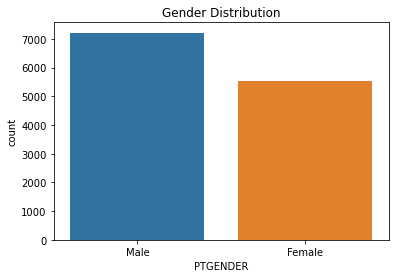

In [3]:
sns.countplot(raw_data.PTGENDER)
plt.title("Gender Distribution")
plt.show()

While not a completely even distribution there isn't a vast disparity in the data set on the basis of gender.

There were some other demographic quantities/qualities being tracked, what is the racial distribution?

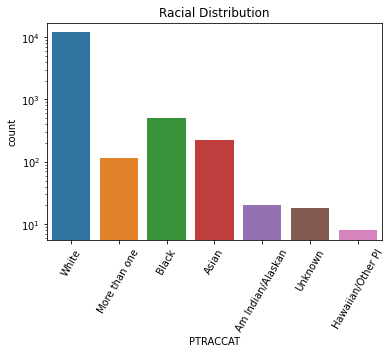

In [4]:
g = sns.countplot(raw_data.PTRACCAT)
plt.title("Racial Distribution")

g.set_yscale("log")
plt.xticks(rotation=60)
plt.show()

Hmmm, so the results are dominated by white. This may be a result of several factors, trials conducted in a primarily white communities, "white" people are more suceptible to dementia (if this is true then we should see a difference in the racial distribution of the unimpaired v's the impaired), racial bias in trial recruitment. Regardless of the origin of this skew, on the basis of these results meaningful conclusions with race as a differentiator are unlikely. 

There is also ethnicity as a patient catagory, what does it show?

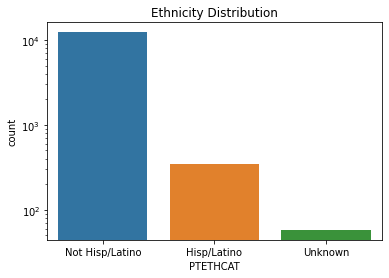

In [5]:

g = sns.countplot(raw_data.PTETHCAT)
g.set_yscale("log")
plt.title("Ethnicity Distribution")
plt.show()

This is strange, hispanic/latino is not considered a race. Again the number of visits suggests that these results are unlikely to give meaningful differentiation on the basis of "ethnicity".
Lets dig into the idea that maybe white people are more suceptible to cognitive impairment. Lets do the same racial count but split by patients who develop cognitive impairment and those who do not. First the same plot but split into impaired and unimpaired.

PTRACCAT
impaired PTRACCAT                   
0        Am Indian/Alaskan         7
         Asian                    51
         Black                   149
         More than one            12
         White                  2545
1        Am Indian/Alaskan        13
         Asian                   173
         Black                   346
         Hawaiian/Other PI         8
         More than one           101
         Unknown                  18
         White                  9318

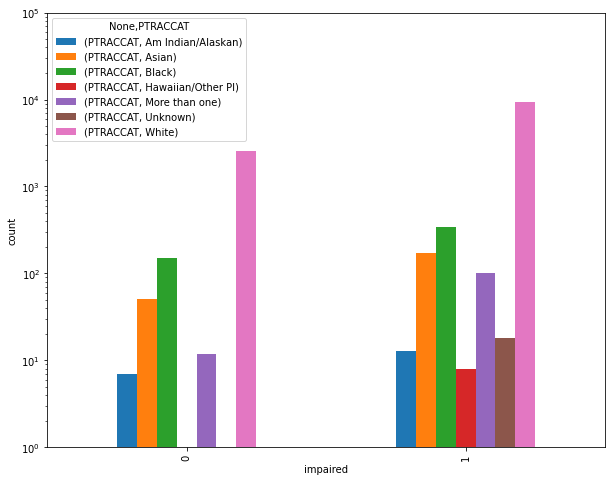

In [6]:
raw_data.groupby(["impaired", "PTRACCAT"])[["PTRACCAT"]].count().unstack().plot(kind="bar", logy=True, figsize=(10,8), ylim=(1,100000)).set_ylabel("count")
raw_data.groupby(["impaired", "PTRACCAT"])[["PTRACCAT"]].count()


Nothing obvious here, perhaps a slight increase in the total proportion of white impaired patients.
Lets do the same comparison but remove the number of visits per patient as a (potentially) confounding factor.

PTRACCAT
impaired PTRACCAT                   
0        Am Indian/Alaskan         1
         Asian                     7
         Black                    21
         More than one             2
         White                   299
1        Am Indian/Alaskan         2
         Asian                    22
         Black                    56
         Hawaiian/Other PI         2
         More than one            16
         Unknown                   3
         White                  1306

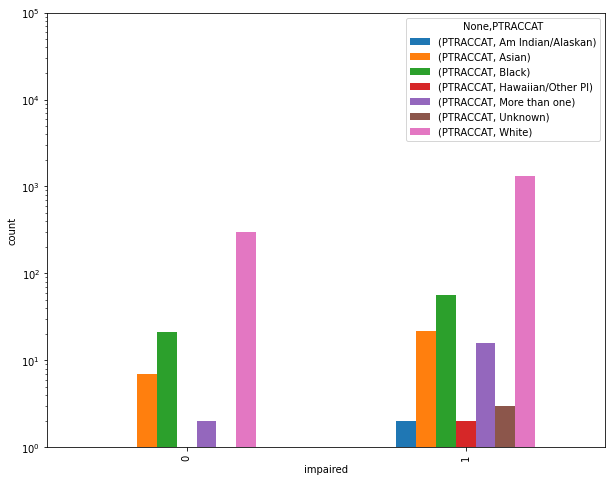

In [7]:
vis0 = raw_data.loc[raw_data.VISNUMS == 0,:]
vis0.groupby(["impaired", "PTRACCAT"])[["PTRACCAT"]].count().unstack().plot(kind="bar", logy=True, figsize=(10,8), ylim=(1,100000)).set_ylabel("count")
vis0.groupby(["impaired", "PTRACCAT"])[["PTRACCAT"]].count()

Again nothing clear, perhaps encouraging that the visit counts were not skewing the data. My conclusion is that the racial/ethnic labeling of this data should not be used for prediction in any models developed with this data.

Lets see if gender makes any difference to outcomes, both development of cognitive impairment and transition.

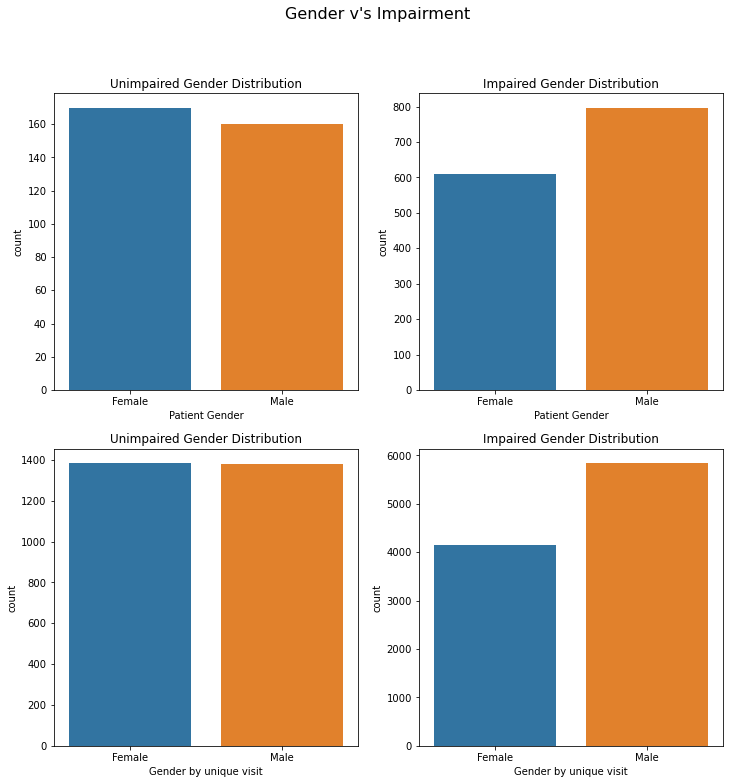

In [9]:
vis0 = raw_data.loc[raw_data.VISNUMS == 0,:]
g, ax = plt.subplots(2,2,figsize=(12,12))
g = plt.subplot(2,2,1)
g = sns.countplot(vis0.sort_values("PTGENDER").loc[vis0.impaired == 0, "PTGENDER"])
g = plt.title("Unimpaired Gender Distribution")
g = plt.xlabel("Patient Gender")
g = plt.subplot(2,2,2)
g = sns.countplot(vis0.sort_values("PTGENDER").loc[vis0.impaired == 1, "PTGENDER"])
g = plt.title("Impaired Gender Distribution")
g = plt.xlabel("Patient Gender")
g = plt.suptitle("Gender v's Impairment", size=16)
g = plt.subplot(2,2,3)
g = sns.countplot(raw_data.sort_values("PTGENDER").loc[raw_data.impaired == 0, "PTGENDER"])
g = plt.title("Unimpaired Gender Distribution")
g = plt.xlabel("Gender by unique visit")
g = plt.subplot(2,2,4)
g = sns.countplot(raw_data.sort_values("PTGENDER").loc[raw_data.impaired == 1, "PTGENDER"])
g = plt.title("Impaired Gender Distribution")
g = plt.xlabel("Gender by unique visit")
plt.savefig("genderVimpairment.png")
plt.show()


Interesting, this data would suggest that men are more susceptible to cognitive impairment than women in this dataset. There are more unimparied women than men in the study despite there being more men then women overal in the study. Looking at the second row of plots it seems that health men are more likely to stay in the study and participate regularly (gender distribution of unimpaired patients versus unimpaired visits) and there is no difference observed in the impaired poulation.

Lets see if there is a gender difference in transition from cognitively healthy to cognitively impaired while enrolled in the study.

In [ ]:
g, ax = plt.subplots(2,2,figsize=(12,12))
g = plt.subplot(2,2,1)
g = sns.countplot(vis0.sort_values("PTGENDER").loc[vis0.change == 0, "PTGENDER"])
g = plt.title("Consistent Diagnosis Gender Distribution")
g = plt.xlabel("Patient Gender")
g = plt.subplot(2,2,2)
g = sns.countplot(vis0.sort_values("PTGENDER").loc[vis0.change == 1, "PTGENDER"])
g = plt.title("Changed Diagnosis Gender Distribution")
g = plt.xlabel("Patient Gender")
g = plt.suptitle("Gender v's Transition", size=16)
g = plt.subplot(2,2,3)
g = sns.countplot(raw_data.sort_values("PTGENDER").loc[raw_data.change == 0, "PTGENDER"])
g = plt.title("Consistent Diagnosis Gender Distribution")
g = plt.xlabel("Gender by unique visit")
g = plt.subplot(2,2,4)
g = sns.countplot(raw_data.sort_values("PTGENDER").loc[raw_data.change == 1, "PTGENDER"])
g = plt.title("Changed Diagnosis Gender Distribution")
g = plt.xlabel("Gender by unique visit")
plt.show()

So again more men changed diagnosis throughout the study than women, but importantly the proportion of men that changed is greater than the proportion of men that were consistent, another indication that men are more likely to develop cognitive impairment in this dataset.

In conclusion, race/ethnicity should be ignored but gender not only is reasonably distributed it also correlates to development of cognitive impairment.